# Machine Learning - 1<sup>st</sup> Assignment

## Student: Sheedeh Sharif Bakhtiar
### Student ID: 400422108

# **Exercise 1:**









## *Can gradient descent get stuck in a local minimum when training a logistic regression model? Why?*


Intuitively, gradient descent works by slowly stepping towards the minima of a loss function through clever use of derivation. With each training epoch, we calculate the slope of our loss function to find the closest minima and we slowly step in the direction of said minima in order to minimize our cost function as much as possible.

The size of these steps is dictated by the *learning rate*. For instance, for a linear regression model with the form:

$$
pred = θx + β
$$

Where $pred$ is our model prediction, $β$ is our intercept, $x$ is our input, and $θ$ is a learned vector representing the coefficients for each element in our input. If we assume Mean Squared Error (MSE) to be our cost function, such that:

$$
MSE = (pred - y)^2
$$

Where $y$ is our label. The function we'll be doing for parameter update during gradient descent is as such:

$$
θ = θ - \frac{\alpha}{n}∑^{n}_{i=1}[(pred_i - y_i)x_i]
$$

(For proof of the formula above, see [Wikipedia's article on Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent))

Where α is our learning rate, which controls how much we should shift the value of our parameters θ during each epoch. The larger the learning rate is, the more the error for the current epoch will affect the parameters.

It is crucial that we adjust our learning rate accordingly, as should the learning rate be too large, we may overshoot past the global minima time and time again, unable to settle in an area where our cost function is sufficiently low.

However, this does not mean that we can set the learning rate to an arbitrarily small number and leave the model to run for many epochs. Save for the concerns regarding computational complexity and the time required to properly train the model, during gradient descent we may get caught in a local minima, similar to the graph illustrated by the image below;




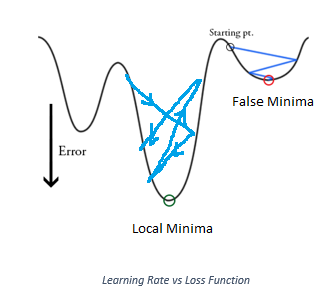

([Image Source](https://towardsdatascience.com/learning-rate-scheduler-d8a55747dd90))

Additionally, there is the issue of "hills" that may be in our error function that may lay between our current point on the parameter space and the global minima that we *won't* overcome, due to the fact that "vanilla" gradient descent is a greedy algorithm, and we usually opt to step in the best direction at every training epoch.

Solutions include [simulated annealing](https://en.wikipedia.org/wiki/Simulated_annealing) algorithms that dynamically adjust the learning rate during training.

# **Exercise 2:** 



## *Suppose you are using polynomial regression. You plot the learning curves and you notice that there is a large gap between the training error and the validation error. What is happening? What are three ways to solve this?*


A validation set is a subset of our training data that we choose to hold back during the error correction phase (e.g. actually computing the cost function and learning from our mistakes) in order to have a relatively unbiased evaluation of how well our model is doing during training and is a useful metric in noticing issues early on. This is different from the test set which we use to evaluate our model *after* training.

During training, we make use of a validation set to gauge our models' performance. This is done to prevent overfitting and to make sure our model is generalizing properly and is truly learning rather than simply "memorizing" individual data points.

While a gap in error regarding model performance on training data and our validation set is quite normal and expected (in fact, should the training error and validation error be *identical*, more likely than not, something has gone awfully wrong), a large gap in our training and validation error could be indicative of a more serious issue that might cause serious problems after training.


### **Validation Error >>> Training Error**

The most common reason for a large gap between validation and training error where the validation error is significantly larger than the training error (rather than the other way around) is *overfitting*.

> Overfitting occurs when the model begins to "overlearn" regarding the training data; in other words, it learns the detail and noise of the training set to an extent that it is no longer able to properly generalize and perform well on the test dataset. This is more prone to happen when the model has high variance for the task at hand. ([Relevant Wikipedia article](https://en.wikipedia.org/wiki/Overfitting))

By nature, validation sets are held out during the training phase and are not used when adjusting model parameters. During training, should we notice that our validation error is *increasing* while our training error is *decreasing*, we can draw the conclusion that our model is beginning to overfit e.g. learning the training dataset *too* well and is slowly losing the ability to generalize over *all* possible data, and we can stop training (otherwise known as [early stopping](https://en.wikipedia.org/wiki/Early_stopping))



### **Training Error >>> Validation Error**

While this specific issue may seem counter-intuitive and impossible, it is very much possible. At first glance, it may be a bit strange as to how our model is able to generalize *better* on the validation set that had been held out during training compared to the dataset that was *actually* used during training. 

#### *Validation loss is lower than training loss, but the difference between these two losses shrinks over time:*

A plausible reason for this gap may be any regularization we might be using (e.g. L1 or L2 regularization). Very simply put, regularization methods penalize our model for extra complexity, in an attempt to prevent overfitting.

By nature, regularization adds extra terms to the error function, thus somewhat artificially inflating our cost function. This could cause a discrepancy between the training error and validation error, since the validation error only comprises prediction error and does not have an extra term for regularization, as opposed to the training error which would consist of both prediction error and regularization.

However, this gap between the training and validation error should decrease over time, given that the model will slowly learn while keeping complexity low, thus decreasing the regularization term that artificially inflated the training error and thus caused such a discrepancy between the validation and training error.

Should this issue occur, there are a number of solutions we could employ in order to keep our model from overfitting, such as:

- Decreasing our model's variance — in other words, decreasing our model's complexity. In neural networks, this could mean that we decrease the number of layers, or in random forest, the number of trees we have, or the number of splits each tree might have.
- If we're employing a neural network model, using dropout to force the model to use less neurons
- Similarly, L1 and L2 regularization to penalize the model's complexity might be effective. 
- Adding more data for training if possible. If not, [data augmentation](https://www.datacamp.com/tutorial/complete-guide-data-augmentation) may be effective here.


#### *Validation loss is lower than the training loss, but the difference stays the same over time:*

Should this be the case, the reason behind this difference may lie in the use of *dropout*, a common mechanism used while training neural networks.

> Dropout works by randomly setting a certain percantage of neurons to 0, effectively forcing the model to learn without these extra neurons.

Similar to regularization, dropout is only used during training, and may cause the model to perform significantly worse during the training phase compared to the validation phase, given that during validation dropout will *not* be employed, and we'll be using all the neurons in our model.



*Sources:*
- [Data Science StackExchange: Is it bad to have a large gap between training loss and validation loss?](https://datascience.stackexchange.com/questions/44578/is-it-bad-to-have-a-large-gap-between-training-loss-and-validation-loss)
- [Medium: Your validation loss is lower than your training loss? This is why!](https://towardsdatascience.com/what-your-validation-loss-is-lower-than-your-training-loss-this-is-why-5e92e0b1747e)
- [Baeldung: Training and Validation Loss in Deep Learning](https://www.baeldung.com/cs/training-validation-loss-deep-learning#:~:text=At%20times%2C%20the%20validation%20loss,and%20hence%20generates%20large%20errors.)
- [Machine Learning Mastery: What is the Difference Between Test and Validation Datasets?](https://machinelearningmastery.com/difference-test-validation-datasets/)
- [Data Science StackExchange: Validation loss much higher than training loss](https://datascience.stackexchange.com/questions/65471/validation-loss-much-higher-than-training-loss)

# **Exercise 3:**

## *Suppose you are using ridge regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter $α$ or reduce it?*

First, let's talk about the bias-variance trade-off.

> The bias–variance tradeoff is the property of a model that the variance of the parameter estimated across samples can be reduced by increasing the bias in the estimated parameters. [Source: Wikipedia](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff)

In other words, the higher the bias, the more our model will be able to generalize, but the less flexible it is, thus potentially unable to capture any hidden nuances in the data, and the higher the variance, the more flexible it is and the more sensitive the model would be to hidden details, but much more prone to overfitting; memorizing the training data in favor of finding an abstract pattern in the data. 

In an attempt to combat this issue, we introduce regularization to find a "happy middle" between bias and variance for our specific problem. 

With regularization, we add an extra term to our cost function that penalizes the complexity of our model. In other words, we penalize the model for any extra variance it might have, urging the model to look for simpler solutions without sacrificing (too much) accuracy. Regularization methods can also be useful in decoupling coefficients that might be very highly correlated with one another, in order to help the model better generalize.

One such method of regularization would be using an L2 regularization penalty, which is equal to the square of the magnitude of coefficients. 

[Ridge regression](https://en.wikipedia.org/wiki/Ridge_regression) is in turn a regression model trained with an L2 regularization term. Assuming our loss function is mean squared error (MSE), our cost function with L2 regularization would be:

$$
cost = ∑^{N}_{i=0}(y_i - ∑^M_{j=0}x_{ij}W_j)^2 + α∑^{M}_{j=0}W_j^2
$$

Where $y$ and $x$ are our labels and our inputs respectively, $W$ are coefficients we're attempting to keep small and decoupled in an attempt to prevent overfitting. The second term in the cost function above correlates to the L2 regularization term. 

$\alpha$ dictates how much we wish to factor this penalty term into our cost function. The higher $\alpha$ is, the more the model is penalized for its *variance*.

(Of course, we're free to replace the loss function above with another loss function of our choice — the main point of interest here is the regularization term $α∑^{M}_{j=0}W_j$)

Reasons behind any large gaps between training and validation loss were discussed in the previous section, but the problem statement specifies that the model's training and validation loss are almost equal, and fairly high. This would indicate that the model is unable to learn due to high bias. 

- Again, as per the previous question, if the training error was much less than the validation error, we could assume that overfitting is the issue here.

**Therefore, I would recommend decreasing the regularization hyperparameter α to increase model variance.**

An incredibly important thing to note here is that the issue might not be the regularization term at all, and may lie in another hyperparameter, such as the learning rate, or in the data itself, should the data be particularly noisy.

# **Exercise 4:**

## *Why would you want to use:*
### - *Ridge regression instead of plain linear regression (i.e., without any regularization)?*
### - *Lasso instead of ridge regression?*
### - *Elastic net instead of lasso regression?*


Similar to the previous question, this question tackles the topic of regularization in regression models. Before I answer each question individually, I'll be giving a brief overview on *ridge regression*, *lasso regression* and *elastic net regression*.

#### **Ridge Regression**

In the previous question, I gave a definition for **L2 penalty term** that was added to the end of a model's cost function in an attempt to decouple highly correlated independent variables, with said penalty term being the squared sum of coefficients;

$$
α∑^M_{j=0}W_j^2
$$

Where $m$ is the number of training samples in our batch, $W$ being the regression model's coefficients and $\alpha$ dictates how much of an effect our penalty term will have in our cost function.

> A regression model that utilizes the L2 penalty term is called **ridge regression**.


One thing to note here is that ridge regression is incredibly sensitive to the scale of the predictors, therefore, it's incredibly important to scale before feeding our input to our model so that all predictors can be on the same scale.

Ridge regression also performs well compared to "vanilla" linear regression when we have many parameters compared to the number of observations.

Ridge regression also performs very well when the target outcome is a function of many features, rather than just relying on a small number of predictors. 

However, a disadvantage this model has is that it will include all the predictors in the final model, in comparison to other methods that cherry-pick the predictors it needs. While ridge regression may shrink some coefficients to zero, none of them will be set exactly to zero. So, if we have a very, very large number of features, ridge regression might not be the best choice.

#### **Lasso Regression**

However, there is an **L1 penalty term** as well, which is almost identical to the L2 penalty term with the difference being that instead of calculating the sum of squared coefficients, we simply calculate the absolute sum of coefficients;

$$
α∑^M_{j=0}W_j
$$

> A regression model that utilizes the L1 penalty term is called **lasso regression**.

Lasso regression shrinks less important features to zero, removing them altogether. This could be incredibly useful when we have a very large number of features and wish to remove the unimportant ones.

#### **Elastic Net Regression**

Lastly, there is **elastic net regularization**, which linearly combines L1 and L2 penalties in a single cost function, as seen in the following formula;

$$
cost = ∑^{N}_{i=0}(y_i - ∑^M_{j=0}x_{ij}W_j)^2 + α_1∑^M_{j=0}W_j + α_2∑^{M}_{j=0}W_j^2
$$

Where $\alpha_1$ dictates how much of an effect the L1 penalty term has, and $\alpha_2$ dictates how much of an effect the L2 penalty term has.

Elastic net regression combines the advantages of both lasso and ridge regression, as it effectively shrinks some coefficients to zero (like in lasso) while also learning to make use of different coefficients together (like in ridge).

In practice, we'll be wanting to use elastic net over ridge or lasso on their own, as with the two of them together, we're able to capitalize on both their strengths' while side-stepping some issues they may have.


#### So, in summary, to answer Exercise 4's questions:

- *Ridge regression instead of plain linear regression (i.e., without any regularization)?*

As I've mentioned multiple times by now, regularization by itself (and not just ridge regression) can prevent overfitting and help with generalization. 

In the case of ridge regression, decouple highly correlated independent variable in an attempt to force the model to utilize all the information available to it, and not just several "stronger" variables.

- *Lasso instead of ridge regression?*

There are a couple potential reasons why we might prefer lasso to ridge regression;

For one, lasso regression also doubles as a sort of "feature selector" as it has a tendency to drive parameters to zero (as I've previously mentioned). Secondly, ridge regression is very sensitive to scaling (at least compared to lasso regression) therefore, should we be unable to scale our data for whatever reason (e.g. it's hard to do proper scaling during training without being at risk of data leakage), lasso may be the better choice for our specific task.

Another advantage lasso regression has over ridge regression is interpretability, given how lasso regression uses a lower amount of coefficients in the model.

Generally, lasso might perform better when some predictors have relatively high coefficients and the remaining predictors have coefficients that are close to zero.


- *Elastic net instead of lasso regression?*

As I've mentioned earlier, elastic net regression combines the advantages of both lasso and ridge regression by incorporating the both of them in the cost function. Elastic net not only drives "useless" coefficients to zero like lasso does, but also learns to utilize all the remaining coefficients *together* like ridge regression does.


*Sources:*
- [Towards Data Science: L1 and L2 Regularization Methods](https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c)
- [Statistics How To: Regularization: Simple Definition, L1 & L2 Penalties](https://www.statisticshowto.com/regularization/#:~:text=L2%20regularization%20adds%20an%20L2,and%20SVMs%20use%20this%20method.)
- [Wikipedia: Elastic net regularization](https://en.wikipedia.org/wiki/Elastic_net_regularization)
- [Machine Learning Compass: Elastic Net Regression Explained, Step by Step](https://machinelearningcompass.com/machine_learning_models/elastic_net_regression/)
- [STHDA: Penalized Regression Essentials: Ridge, Lasso & Elastic Net](http://www.sthda.com/english/articles/37-model-selection-essentials-in-r/153-penalized-regression-essentials-ridge-lasso-elastic-net/)
- [Towards Data Science: Ridge, LASSO, and ElasticNet Regression](https://towardsdatascience.com/ridge-lasso-and-elasticnet-regression-b1f9c00ea3a3)

# **Exercise 5:**

## *Implement Linear Regression with Mean Absolute Error as the cost function from scratch. Compare your results with the Linear Regression module of Scikit-Learn.*

Linear regression is arguably the simplest machine learning regression model where we attempt to learn the coefficients of a polynomial such that our polynomial best fits our data. 

Our model has the form:

$$
pred_i = θx_i + \alpha
$$

Where $x$ is our model's input (e.g. our observation), $\theta$ is our model's coefficient that we aim to learn during training, and $\alpha$ is our intercept (assuming that our data is not centered, $\alpha \neq 0$), otherwise known as bias — something that we also learn during training.

As per problem specification, our cost function is [mean absolute error (MAE)](https://en.wikipedia.org/wiki/Mean_absolute_error), which is calculated as the sum of absolute errors divided by sample size, as shown before;

$$
MAE = \frac{∑^{n}_{i=1}|y_i - pred_i|}{n}
$$

We'll be using this function during training in order to gauge how far off we are from the actual labels (e.g. the truth). 

We're looking to adjust the parameters $\theta$ such that;

$$
minimize \frac{1}{n}∑^{n}_{i=1}(pred_i - y_i)^2
$$

To do that, we'll be using [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) for parameter update, in which we use the chain rule to calculate the partial derivative of the error function;

$$
\frac{∂MAE}{∂pred} = \Biggl\{{1 ~~~~ if (pred > y)\\ {-1} ~~~~ if ~ (y < pred)}
$$

Which we'll be using for parameter update;

$$
θ_j = θ_j - \frac{\lambda}{n}∑^{n}_{i=1}[(\frac{∂MAE}{∂pred})x_i]
$$

Where $\lambda$ is our learning rate that'll dictate how big each "step" should be — in other words, how much we'll be adjusting our parameters at each epoch.

However, gradient descent requires the error function to be differentiable across the entire sample space, and unfortunately for $y_i = pred_i$ this is not the case. However, for the purposes of this code demo, we'll assume $\frac{∂MAE}{∂pred}$ to be $1$ in the *highly* unlikely case that $pred = y$.

In the next few sections, we'll be focusing on the implementation of this specific model.

### Setup and Loading the Data

First, we'll import the libraries we need, namely `Numpy` and `Pandas`, both incredibly popular python modules commonly used in machine learning tasks. [Numpy](https://numpy.org/) is used for number and matrix operations, and [Pandas](https://pandas.pydata.org/) is used for handling large amounts of data, as data used for training machine learning models tends to be quite large.

Secondly, we'll set a `random_seed` that we'll be using in functions that have randomness (as we'll see later) for reproducibility.

In [247]:
# Import relevant libraries
import numpy as np
import pandas as pd


# Set random seed.
rand_seed = 7

As mentioned in the telegram group, the dataset we'll be using is the [Diabetes dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set). Thankfully, [SciKit Learn](https://scikit-learn.org/) — an incredibly popular machine learning python module has the dataset already downloaded and ready to use, so using the [`sklearn.datasets.load_diabetes`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html) function, we'll load the dataset.

Calling this function returns the data back to us. This function has 3 parameters that specifies _how_ the data should be given;
- `return_X_y`: What format the data should be in. If `True`, the data is passed as a `(data, target)` tuple instead of a [`Bunch`](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html) object. This parameter defaults to `False`, but I personally prefer the tuple object, so I'll be setting this parameter to `True.`
- `as_frame`: If `True`, the data returned by the `load_diabetes` function will be a [`pandas.DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html). While this parameter also defaults to `False`, I again prefer to work with a DataFrame, so I'll be manually setting this parameter to `True`. If `return_X_y` is also True, then the returned `(data, terget)` will be a pandas DataFrame.
- `scaled`: Defaults to `True`, and as the name suggests, the feature variables are mean centered and scaled by the standard deviation times the square root of the number of samples. This is preferred, so we'll leave this parameter be.

In [2]:
from sklearn.datasets import load_diabetes

# Load data
df, labels = load_diabetes(as_frame=True, return_X_y=True)

# Preview data
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


### Creating our Model

We have 10 features and a single bias, so we have **10+1** parameters that we'll store in a list that'll represent the vector $θ$ that we're looking to learn during training.

We'll initialize them with random values between 0 and 1 using numpy's [`np.random.rand`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html):

In [3]:
np.random.seed(rand_seed)    # Setting seed for reproducibility

parameters = np.random.rand(11)

print(parameters)

[0.07630829 0.77991879 0.43840923 0.72346518 0.97798951 0.53849587
 0.50112046 0.07205113 0.26843898 0.4998825  0.67923   ]


We'll then add a function that takes the input and returns the output for our linear regression model.

Given that we have 10 features, our linear regression model would look like this:

$$
y = (∑_{i=1}^{10}\theta_ix_i) + α
$$

To get the predictions for our model, all we need to do is multiply our input vector by our vector of coefficients (save for the intercept/bias) and finally add the bias at the end. 
> For the intercept, we can also add a $1$ at the end of our input vector and leaving the bias in the vector of coefficients, and that'll effectively be the same as multiplying the coefficients and input and adding the bias at the end.

In [4]:
def get_pred(input):
  # Convers Pandas Series row to Numpy Array and append 1 to the end of input array for bias
  row = np.append(input.to_numpy(), 1)
  row *= parameters
  return row.sum()

# Get prediction for first row:
pred = get_pred(df.iloc[0])
print(pred)

0.6771201503259253


### Calculating the Error

As mentioned previously, as per the problem specification we'll be using mean absolute error as our error function, in the form below;

$$
MAE = \frac{∑^{n}_{i=1}|y_i - pred_i|}{n}
$$

Here, I'll implement a simple function `calc_single_error` for calculating the error of a single prediction;

In [5]:
def calc_single_error(pred, true):
  return abs(pred - true)    # MSE


# Calculate error for first prediction
err = calc_single_error(pred, labels[0])
print(err)

150.32287984967408


The error here is quite large, however, we hadn't expected high accuracy given that we had *just* initialized our coefficients with random variables. Over different training epochs we'll aim to tune these coefficients to get better results.

While the function above works just fine in gauging error, this isn't enough as we're calculating error over a single prediction, as we're looking to do this:

$$
minimize \frac{1}{n}∑^{n}_{i=1}|pred_i - y_i|
$$

over the entire dataset.

So, we'll create another function `cost_function` that calculates the cost over the entire dataset, divided by the number of samples;

In [6]:
# Calculate total cost over entire batch
def cost_function(preds, labels):
  total_cost = 0
  n_samples = len(preds)

  # Calculate sum of error
  for i in range(n_samples):
    pred = preds[i]
    error = calc_single_error(pred, labels[i])
    total_cost += error
  
  # Divide by number of samples and return
  return total_cost/n_samples


# Get prediction for every sample in dataset
preds = [get_pred(df.iloc[i]) for i in range(df.shape[0])]

# Calculate total cost
cost = cost_function(preds, labels)
print(cost)

151.45425416677492


### Parameter Tuning

Now that we've calculated our error, it's time to adjust our parameters according to the error and the formula I've previously mentioned, where we'll be tuning each parameter by:

$$
θ_j = θ_j - \frac{\lambda}{n}∑^{n}_{i=1}[(\frac{∂MAE}{∂pred})x_i]
$$

where,

$$
\frac{∂MAE}{∂pred} = 
\begin{cases}
1 & if (pred > y) \\ 
{-1}& if ~ (y < pred)
\end{cases}
$$


Given that we've already calculated the derivatives, this is quite simple to do.

In [7]:
learning_rate = 0.01

print(f"Parameters before adjustment: {parameters}")
print(f"Total cost after adjustment: {cost}")

def train(input_df, labels, lr = learning_rate):
  global parameters
  input_shape = input_df.shape[0]

  # For storing parameter-wise cost
  total_cost = [0 for i in range(len(parameters))]

  # Loop over all data in batch
  for i in range(input_shape):
    row = np.append(input_df.iloc[i].to_numpy(), 1)
    pred = get_pred(input_df.iloc[i])
    preds.append(pred)

    # Delta will be the term that represents the (∂MAE/∂pred) term
    delta = 1
    if pred < labels[i]:
      delta = -1
    
    # Parameter-wise cost
    for j in range(len(parameters)):
      total_cost[j] += delta * row[j]
  
  # Adjust parameters
  for i in range(len(parameters)):
    parameters[i] -= (lr/input_shape) * total_cost[i]
  


train(df, labels)
preds = [get_pred(df.iloc[i]) for i in range(df.shape[0])]    # Get predictions with newly adjusted parameters

print(f"Parameters after adjustment: {parameters}")
print(f"Total cost after adjustment: {cost_function(preds, labels)}")


Parameters before adjustment: [0.07630829 0.77991879 0.43840923 0.72346518 0.97798951 0.53849587
 0.50112046 0.07205113 0.26843898 0.4998825  0.67923   ]
Total cost after adjustment: 151.45425416677492
Parameters after adjustment: [0.07630829 0.77991879 0.43840923 0.72346518 0.97798951 0.53849587
 0.50112046 0.07205113 0.26843898 0.4998825  0.68923   ]
Total cost after adjustment: 151.44425416677495


Now that we know this works, we'll keep repeating this process over an `n_epochs` number of epochs, tuning parameters by a little bit every time.

In [ ]:
n_epochs = 5000

cost_over_time = []    # For graphing purposes later on

for i in range(n_epochs):
  train(df, labels)
  preds = [get_pred(df.iloc[i]) for i in range(df.shape[0])]

  if i%500 == 0:
    cost_over_time.append(cost_function(preds, labels))
    print(f"Epoch: {i+1}/{n_epochs}")
    print(f"Total cost after adjustment: {cost_function(preds, labels)}")

print(f"Total cost after adjustment: {cost_function(preds, labels)}")

Epoch: 1/5000
Total cost after adjustment: 151.434254166775
Epoch: 501/5000
Total cost after adjustment: 146.4342541667751
Epoch: 1001/5000
Total cost after adjustment: 141.43425416677525


Now that we're done training, we can illustrate our model's cost during training using graphing libraries such as [`matplotlib`](https://matplotlib.org/) and [`seaborn`](https://seaborn.pydata.org/). This way we'll get a good image of how our model improved over time.

The graph I'll be using is a [`seaborn.lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) which plots the data and also fits a regression model. Intuitively, this means we both have "dots" for individual datapoints, but a line to plot the general trajectory of our datapoints.

In [ ]:
# Create graph of cost over time
import matplotlib.pyplot as plt
%matplotlib inline    
# ^ So we can render graphs in-notebook
import seaborn as sns

In [ ]:
plot_data = pd.DataFrame({"cost": cost_over_time, "epoch": [i*100 for i in range(len(cost_over_time))]})

sns.lmplot(data=plot_data, y="cost", x="epoch")

### Comparison

For performance comparison, as per problem specification, we'll be using Scikit-Learn's [`sklearn.linear_model.LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). As mentioned in the documentation, using this model is very straightforward;
1. We create an instance of the model we're looking to train.
2. We fit our model to our data using the `fit(X, y)` function.

Once we've fit `sklearn`'s linear regression model to our data, we can evaluate the model like we had done with our own model.

In [ ]:
from sklearn.linear_model import LinearRegression

# Create model and fit data
sk_reg = LinearRegression().fit(df, labels)

# Get predictions across all the data
sk_pred = sk_reg.predict(df)

# Calculate cost
cost = cost_function(sk_pred, labels)
print(cost)

As we can see in the results above, Scikit Learn's model performs significantly better than our model. The reason for that will be explored in the next question, when we tackle the topic of normal equations and directly calculating the best possible coefficients from the data through clever matrix multiplication — something that Scikit Learn does.

# **Exercise 6:**

## *Implement Linear Regression using the normal equation as the training algorithm from scratch.*

The method that was used for training our linear regression model was an iterative optimization algorithm that relied on calculating the model's error (in other words, how far it is from the true labels) at each epoch, and adjusting the model coefficients according to that error a little bit at a time until we reached a solution.

However, there is a closed form solution to the problem of finding the parameters that will minimize the error function at hand. This solution consists of solving an algebraic equation known as the [normal equation](https://en.wikipedia.org/wiki/Numerical_methods_for_linear_least_squares).

While this method is rather computationally expensive and quite infeasible for large datasets, for small datasets such as the diabetes dataset we can solve this equation to find the best fit for our data.

This normal equation is in the form:

$$
\theta = (X^TX)^{-1}.(X^Ty)
$$

Where $\theta$ is the value of the parameters we're looking to optimize, $X$ being our input features and $Y$ being our outputs, otherwise known as labels.

(The derivation of the normal equation *itself* is beyond the scope of this question, so I will omit that, however the links in the sources section of this question do contain proofs.)

So technically, all we need to do is to perform matrix operations on our data and it's labels and we'll have calculated the best value for our coefficients.

First things first, we'll make a copy of our training data. 
We'll use this copy, and we'll add a column for the intercept/bias which solely consists of ones;

In [ ]:
# Make copy of training DataFrame and add intercept column

normal_df = df.copy()
normal_df['bias'] = 1
normal_df.head()

Next, I'll convert the $X$ data from a Pandas DataFrame to a Numpy Array such that I'll be able to manipulate the data more easily. Then, I'll solve the normal equation using the formula mentioned earlier in this question;

In [ ]:
data = normal_df.to_numpy()    # Convert to pd.DataFrame to np.array


# Normal equation here
coefficients = np.dot(np.linalg.inv(np.dot(data.T,data)), np.dot(data.T, labels))

# List calculated coefficients
coefficients

Now that we've calculated the coefficients, I'll add a function `get_pred_coef` where an input vector is given. Identical to the previous linear regression model that had been implemented, to get the model prediction, all we need to do is multiply the model's coefficients with the input vector to get the model outputs.

- A thing to note here is that an extra $1$ is added to the end of the input vector. This is the bias/intercept.

In [ ]:
def get_pred_coef(input):
  # Convers Pandas Series row to Numpy Array and append 1 to the end of input array for bias
  row = np.append(input.to_numpy(), 1)     # Intercept
  row *= coefficients
  return row.sum()

print(f"Prediction for first row: {get_pred_coef(df.iloc[0])}")     # Predicted value
print(f"Label: {labels[0]}")    # True value

Now that we've calculated the coefficients and that we're able to make predictions with this model, we can gauge this model's performance the same way we had gauged the previous two models; by calculating the cost function using the MSE-based `cost_function` function I had defined in the previous question; 

In [ ]:
# Calculating total cost
coef_preds = [get_pred_coef(df.iloc[i]) for i in range(df.shape[0])]    # Get predictions
cost_function(coef_preds, labels)

What's interesting is that the cost of this model is *identical* to `scikit-learn`'s linear regression model, so it's safe to assume that Scikit Learn is using this method as well, as there is no stochasticity in this particular method that might be cause for any sort of variation in the results.


*Sources:*
- [Towards Data Science: Performing Linear Regression Using the Normal Equation](https://towardsdatascience.com/performing-linear-regression-using-the-normal-equation-6372ed3c57)
- [Medium: Linear Regression With Normal Equation Complete Derivation (Matrices)](https://medium.com/swlh/understanding-mathematics-behind-normal-equation-in-linear-regression-aa20dc5a0961)
- [GeeksForGeeks: ML | Normal Equation in Linear Regression](https://www.geeksforgeeks.org/ml-normal-equation-in-linear-regression/)

# **Exercise 7:**

## *Compare bootstrapping with cross-validation. In which conditions we should use bootstrapping?*

**Bootstrapping** sampling refers to the technique where we choose a data sample at random and replace it later for the purpose of estimating a population parameter. This estimated parameter is comparable to the actual population parameter.

In the context of machine learning, bootstrap sampling is used for ensemble algorithms, called [*bootstrap aggregating*](https://en.wikipedia.org/wiki/Bootstrap_aggregating) or *bagging*, where a number of subsets from the dataset are sampled (and later replaced). Then, these subsets of data is fed to machine learning models. The outputs of these models are then ensembled (either by averaging for regression or voting for classification) and used for a more "stable" and confident final prediction.

While bagging is normally used on decision tree models, in theory it can be used on any machine learning algorithm.

Bagging prevents overfitting and improves training stability by reducing variance in machine learning algorithms for both regression and classification. It also requires a low amount of computation, as we only need a few samples to bootstrap successfully.

> Bootstrap sampling can also be used on a single model as well, where we train the model on the entire dataset and gauge it's performance on a subset of the *training* dataset (e.g. data it's seen before in *this* epoch)

On the other hand, **cross-validation** is also a technique where we take different machine learning models and train them on subsets of the data. Cross validation could be used for overfitting detection by gauging model performance on unseen data.

As I've just mentioned, cross validation divides the data into multiple subsets, or *folds*, and uses one as a validation set, while the rest are used for training the model(s). This process is repeated with a different fold being used as a validation set in each training round. 

Cross validation can also be used for hyperparameter tuning by selecting values that perform the best in the validation set. Cross validation is also more data efficient than traditional validation techniques, as in traditional validation a subset of the dataset is permanently held out over all training rounds, while in cross validation, the subset of data that's used for model evaluation changes every training round.

Needless to say, though there are drawbacks to this method. For one, cross validation is rather computationally expensive, especially when the number of folds is large or when the model is quite difficult to train. Additionally, the bias-variance tradeoff is important here; too few folds may result in high variance, but too many folds might result in high bias.

But these two methods sound awfully similar to one another, as they are both *resampling* methods. However, they are quite different and there are times when we might prefer one method to another.

For one, bootstrap resamples with replacement, e.g. the sampled data is put back and the dataset used to train models is just as large as the original dataset. However, this also might mean that some data points may never be used in datasets that are created via sampling.

While the main purpose of cross-validation is measuring model performance, bootstrapping is used to establish empirical distribution function for a wide range in statistics (for instance, widespread in the sense of a large variance from the mean). Bootstrap also gives us a standard error of the estimates, while cross validation mostly just provides estimates of test error.
- This is important, given that there are fewer combinations possible in cross validation compared to bootstrapping. For instance, if we wish to gauge our model on a statistically wide range of data and also use that data during training, then bootstrapping might be a better option.

Additionally, bootstrapping might not be as good as cross validation for effectively validating our model, but is better for building ensemble models or even just estimating parameters.



*Sources:*
- [Wikipedia: Bootstrap Aggregating](https://en.wikipedia.org/wiki/Bootstrap_aggregating)
- [Analytics Vidhya: What is Bootstrap Sampling in Statistics and Machine Learning?](https://www.analyticsvidhya.com/blog/2020/02/what-is-bootstrap-sampling-in-statistics-and-machine-learning/)
- [KDNuggets: What is Bootstrapping?](https://www.kdnuggets.com/2023/03/bootstrapping.html) 
- [Amazon: Cross-Validation](https://docs.aws.amazon.com/machine-learning/latest/dg/cross-validation.html)
- [GeeksForGeeks: Cross Validation](https://www.geeksforgeeks.org/cross-validation-machine-learning/)
- [TowardsDataScience: Cross-Validation in Machine Learning](https://towardsdatascience.com/cross-validation-in-machine-learning-72924a69872f)
- [Data Science StackExchange: What is the difference between bootstrapping and cross-validation?](https://datascience.stackexchange.com/questions/32264/what-is-the-difference-between-bootstrapping-and-cross-validation)

# **Exercise 10:**

## *Implement Forward and Backward Feature selection algorithms from scratch with MSE as the metric.* 

For this, I'll be using the diabetes dataset again. Just in case, I'll reload it to undo any changes that may have been made to the dataframe from beforehand;

> For a more detailed explanation of how this dataset is being loaded and what different parameters mean, please refer to *Exercise 6: Linear Regression from Scratch*

In [13]:
from sklearn.datasets import load_diabetes

# Load data
df, labels = load_diabetes(as_frame=True, return_X_y=True)

# Preview data
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


Because of the nature of this question, I will not be performing any feature engineering, however, for later reference, I will be generating a heatmap of feature correlations;

<Axes: >

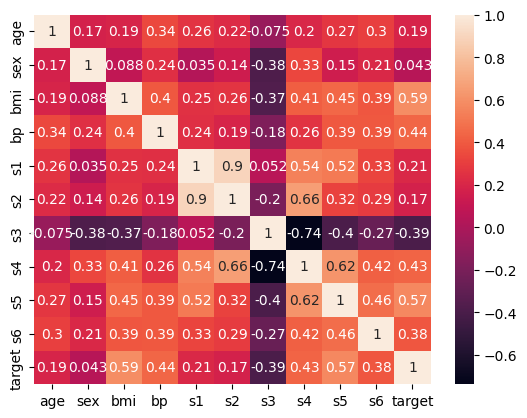

In [17]:
import seaborn as sns

full_df = df.copy()    # Create copy of dataframe
full_df["target"] = labels

corr = full_df.corr()    # Calculate correlation using Pandas's built in correlation function. Is explained a bit more in Q13
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

Judging by the heatmap above and checking the row/column corresponding to the `target` column (e.g. what we're aiming to predict) has a positive relation with columns such as `s5` and `bmi`, and a negative correlation with `s3`, so we can expect these columns to be useful in the future.

### Forward Selection

Forward selection is a form of [stepwise regression](https://en.wikipedia.org/wiki/Stepwise_regression) — a way to pick and choose features to be used in our machine learning model. In this specific method, we start with an empty model. In each step, we add a feature, that is, the feature that had given us the biggest improvement to our model. We continue doing this until we either run out of features or our model performance fails to improve with any new features.

For this, I'll be using Scikit Learn's [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model for simplicity and relatively small computation time.

But first, I'll focus on the metric specified in the problem: [mean squared error (MSE)](https://en.wikipedia.org/wiki/Mean_squared_error). This metric is a relatively simple one, which is calculated by summing the squared difference between the true value and the prediction and then dividing the result by the number of predictions;

$$
MSE = \frac{1}{n} \sum^{n}_{i=1}(true_i - pred_i)^2
$$

Despite Scikit Learn having an implementation [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html), MSE is relatively simple to implement in python, especially with the help of modules such as Numpy. I'll be wrapping the operation in a function named `mse` to be used later.

In [33]:
def mse(pred, true_val):
    return (((pred - true_val)**2).sum())/10

Moving onto forward selection, the way I've implemented this technique is as such; 

I'll have a list of candidate features to add to our model named `candidate_features`. Initially, this list is equal to all the possible features (in other words, all columns in our data). Then, I'll iterate over all of these candidate features one by one, retraining the model and calculating its performance on the validation dataset. The best feature will be selected to be added onto the model, and we'll repeat the process on the remaining features until our model performance no longer increases, or we run out of features.

I'll have a list called `best_performing_features` which consists of the best features which will be updated at the end of each step. `best_performance` will also be updated.

In [62]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

candidate_features = list(df.columns.values)   # List all potential features
best_candidate = None
best_candidate_performance = np.inf

# For logging best performing model so far
best_performance = np.inf     # The less our model's 
best_performing_features = []

# Splitting data into train/validation sets for (somewhat) accurate assessment  
sel_train, sel_val = train_test_split(df, test_size=0.2, random_state=rand_seed)   
train_label, val_label = train_test_split(labels, test_size=0.2, random_state=rand_seed)


while len(candidate_features) > 0:
    for candidate in candidate_features:
        # Create subset of training dataset with selected features
        current_features = best_performing_features + [candidate]
        train_subset = sel_train[current_features]
        
        # Train linear regression model
        reg = LinearRegression().fit(train_subset, train_label)
        
        # Get prediction on validation set
        val_subset = sel_val[current_features]
        pred = reg.predict(val_subset)
        
        # Get model performance using mse() defined above
        cost = mse(pred, val_label)
        if cost < best_candidate_performance:
            best_candidate_performance = cost
            best_candidate = candidate
        
    # Check if model has improved
    if best_candidate is not None:
        best_performing_features.append(best_candidate)
        print(f"Adding feature: {best_candidate}")
        candidate_features.remove(best_candidate)
        best_performance = best_candidate_performance
    
    else:
        print("No improvement! Stopping...")
        break
        
    # Reset loop
    best_candidate = None
    best_candidate_performance = best_performance

print("Selected features: ")
print(best_performing_features)
print(f"Best model cost: {best_performance}")

Adding feature: bmi
Adding feature: s5
Adding feature: bp
Adding feature: s3
Adding feature: s6
No improvement! Stopping
Selected features: 
['bmi', 's5', 'bp', 's3', 's6']
Best model cost: 25712.165483674544


As predicted from the heatmap, features with high correlation were picked early and were used in the final model.


### Backward Selection

Backward selection is another form of stepwise regression that works in the opposite manor as forward selection, in that we first start off with *all possible features* and iterate over all of them one by one, removing a feature with each step until we can no longer remove any more features.


At each step, we remove the feature that has the least impact on the model's performance until there are no more features that we can remove without statistically hurting the model performance.

As for my implementation, my approach will be very similar to my implementation for forward selection, with the difference that I'll stop removing features when there are no features I can remove without increasing the model's cost by 1% of the previous model's cost.

In [68]:
remaining_features = list(df.columns.values)
removed_features = []

candidate_feature = None
best_candidate_cost = np.inf

prev_cost = np.inf

while len(remaining_features) > 0:
    for feat in remaining_features:
        # Create subset of training dataset with selected features
        features_to_drop = removed_features + [feat]
        train_subset = sel_train.drop(columns=features_to_drop, axis=1)
        
        # Train linear regression model
        reg = LinearRegression().fit(train_subset, train_label)
        
        # Get predictions on validation set
        val_subset = sel_val.drop(columns=features_to_drop, axis=1)
        pred = reg.predict(val_subset)
        
        # Get model performance using mse() defined above
        cost = mse(pred, val_label)
        if cost < best_candidate_cost:
            best_candidate_cost = cost
            candidate_feature = feat
        
    # Check if removing best feature is "worth it", e.g. 1% decrease
    if best_candidate_cost - prev_cost < prev_cost * 0.05:
        removed_features.append(candidate_feature)
        remaining_features.remove(candidate_feature)
        prev_cost = best_candidate_cost
        print(f"Removing feature: {candidate_feature}")
    else:
        print("No improvement! Stopping...")
        break
    
    # Reset loop
    candidate_feature = None
    best_candidate_cost = np.inf

print("Remaining features: ")
print(remaining_features)
print(f"Best model cost: {prev_cost}")

Removing feature: age
Removing feature: s1
Removing feature: s4
Removing feature: s2
Removing feature: sex
Removing feature: s6
Removing feature: s3
Removing feature: bp
No improvement! Stopping...
Remaining features: 
['bmi', 's5']
Best model cost: 27095.94712816843


*Sources:*
- [Wikipedia: Stepwise Regression](https://en.wikipedia.org/wiki/Stepwise_regression)
- [Statistics How To: Forward Selection](https://www.statisticshowto.com/forward-selection/#:~:text=Forward%20selection%20is%20a%20type,best%20improvement%20to%20your%20model.)
- [Towards Data Science: Backward Elimination for Feature Selection in Machine Learning
](https://towardsdatascience.com/backward-elimination-for-feature-selection-in-machine-learning-c6a3a8f8cef4)

# **Exercise 11:**

## *Suppose the features in your training set have very different scales. Which algorithms (Gradient Descent, Normal Equation, SVD) might suffer from this, and how? What can you do about it?*

In general, algorithms that look for differenced between data samples (e.g. distance, or similarities in the form of a scalar product) are sensitive to feature scales.

Large features might cause large gradients, which in turn might make the calculated cost jump around a bit, making the process of convergence slower. Put differently; when different features have different scales, they might need different learning rates according to their data's scale. Putting all the features on the same scale (to be discussed in the following paragraphs) will help solve this problem. In more extreme cases, without feature scaling, there's a chance that gradient descent might not converge.


In normal equation, feature scaling doesn't quite matter because of how the coefficients are calculated (i.e. matrix multiplication on the entire dataset). In other words, we're not using a numerical method, therefore feature scaling is not necessary.



SVD is also sensitive to feature scaling, as if the features are not on the same scale, the algorithm might determine that the changes in smaller values are much more important than changes in the larger ones when this might not be the case, and it might just be a matter of two features being on vastly different scales.


A potential solution for this sensitivity could be *feature scaling*. 

Feature scaling is normally done in one of two ways: **normalization** or **standardization**.

*Normalization* takes the input values and modifies them so that they're between 0 and 1. *Standardization*  modify the feature values such that they have a mean of 0 and a standard deviation of 1.

An example of a normalization method would be [min-max scaling](https://towardsdatascience.com/everything-you-need-to-know-about-min-max-normalization-in-python-b79592732b79), also known as rescaling, this method is considered to be the most simple of normalization methods. It scales the range of the features to `[0, 1]` or `[-1, 1]`. The general formula is as below:

$$
x′ = \frac{x - min(x)}{max(x) - min(x)}
$$

Where $x$ is the original value and $x′$ is the normalized value. Scikit Learn has implemented this scaler [here](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

An example of a standardization method is [z-score normalization](https://www.statology.org/z-score-normalization/), which works by determining the distribution mean and standard deviation, and then subtracting the mean from each feature. The result of that is then divided by the standard deviation, effectively scaling the feature down to a mean of 0 and a SD of 1;

$$
x′ = \frac{x - \overline{x}}{σ}
$$

Where $\overline{x}$ is the mean of that feature vector, and $\sigma$ is the standard deviation. Scikit Learn has implemented this scaler [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In gradient descent, *especially* stochastic gradient descent, feature scaling can sometimes help with making convergence faster, as it brings more stability into training.


*Sources:*
- [Wikipedia: Feature Scaling](https://en.wikipedia.org/wiki/Feature_scaling#:~:text=Methods-,Rescaling%20(min%2Dmax%20normalization),the%20nature%20of%20the%20data.)
- [Baeldung CS: Feature Scaling](https://www.baeldung.com/cs/feature-scaling#:~:text=Feature%20Scaling%20involves%20modifying%20values,a%20standard%20deviation%20of%201.)
- [CrossValidated StackExchange: SGD is sensitive to feature scaling](https://stats.stackexchange.com/questions/499398/sgd-is-sensitive-to-feature-scaling)
- [CrossValidated StackExchange: What algorithms need feature scaling, beside from SVM?](https://stats.stackexchange.com/questions/244507/what-algorithms-need-feature-scaling-beside-from-svm)
- [Analytics Vidhya: Why gradient descent doesn't converge with unscaled features?](https://medium.com/analytics-vidhya/why-gradient-descent-doesnt-converge-with-unscaled-features-8b7ed0c8cab6)
- [StackOverflow: Should I perform data centering before apply SVD?](https://stackoverflow.com/questions/42024705/should-i-perform-data-centering-before-apply-svd)

# **Exercise 12:**

## *In this part, you are going to work with the News Popularity Prediction dataset. You will implement a regression model using the Scikit-Learn package to predict the popularity of new articles (the number of times they will be shared online) based on about 60 features. You are expected:*
### - *Perform exploratory data analysis on the dataset.*

> I'm using the [original site](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity) for sourcing the data.

First thing I'll do is load the data and preview its contents with `head()`:

In [73]:
import pandas as pd

news_df = pd.read_csv('./data/OnlineNewsPopularity.csv')
news_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


Judging by the [original dataset site](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity#) there are two non-predictive attributes, namely `url` and `timedelta`, which simply means that they do not play a role in our predictions, so before we do any data exploration we can safely drop these two columns.

In [74]:
news_df.drop(columns=["url", " timedelta"], inplace=True, axis=1)

In [76]:
news_df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


Our target variable is the `shares` column; e.g. how many times a particular article has been shared.

The challenge here is that there are many columns in this dataframe, and looking for any relationships in the data surely won't be as easy as simply creating a list of correlations between each column and visualizing it through a `sns.heatmap()`. 

We can look at a more concise and easy-to-read version of our list of columns, so we can have a better idea of what we're dealing with;

In [114]:
news_df.columns

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' gl

In [ ]:
We can also use the builtin `describe()` method to have a better idea of what our columns look like;

In [113]:
news_df.describe()    # Won't show all the columns as there are too many, but it'll give us an idea

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


We can cherry pick a few columns at a time and see where that gets us. 

First off, let's go for the obvious; how much the day of the week had an effect on an article's performance. We can do this with columns like `weekday_is_monday` all the way to `weekday_is_sunday`.

This is done by making a new temporary dataframe consisting of two columns:
- What day of the week it is
- Total shares divided by number of articles — in other words, the average number of shares per weekday. By using the average, we can smooth out any outliers that may skew our data.

In [154]:
weekday_columns = [' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', 
                   ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', 
                   ' weekday_is_sunday']
avg_shares = [0. for _ in weekday_columns]

weekday_df = pd.DataFrame({"Weekday": weekday_columns, "Shares": avg_shares})


for i, col in enumerate(weekday_columns):
    weekday_df.loc[i, "Shares"] = news_df[news_df[col] == 1.0][' shares'].mean()

weekday_df

,Weekday,Shares
0,weekday_is_monday,3647.025822
1,weekday_is_tuesday,3202.500677
2,weekday_is_wednesday,3303.405380
3,weekday_is_thursday,3178.599147
4,weekday_is_friday,3285.181021
5,weekday_is_saturday,4078.185079
6,weekday_is_sunday,3746.740592


[Text(0, 0, 'monday'),
 Text(1, 0, 'tuesday'),
 Text(2, 0, 'wednesday'),
 Text(3, 0, 'thursday'),
 Text(4, 0, 'friday'),
 Text(5, 0, 'saturday'),
 Text(6, 0, 'sunday')]

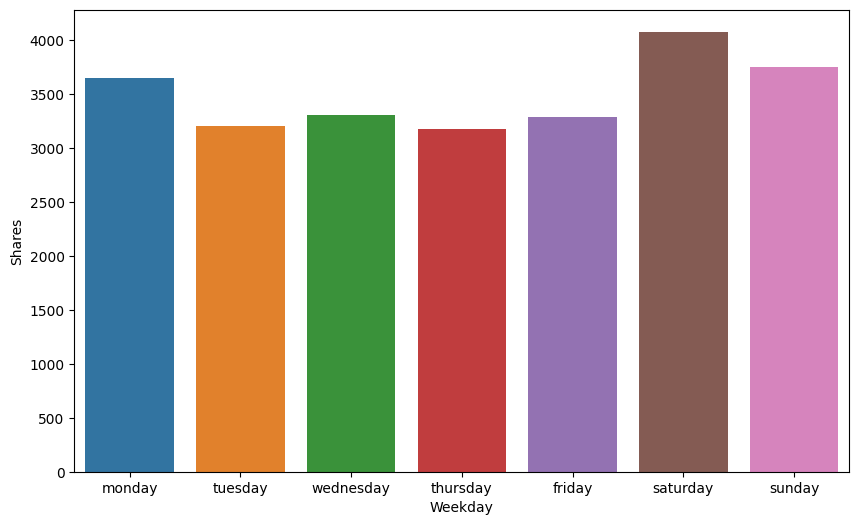

In [155]:
# Plot weekday_df
x_ticks = [x.split("_")[-1] for x in weekday_columns]
plt.figure(figsize=(10, 6))
plot = sns.barplot(x=weekday_df.Weekday, y=weekday_df.Shares)
plot.set_xticklabels(x_ticks)

Unfortunately, because the average number of shares is rather high, any relationship that *might* exist isn't very visible. To fix this, we can scale the values of the per-weekday shares using Min-Max Scaling (previously introduced in another question) before plotting the per-weekday average shares;

In [156]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
weekday_df.Shares = scaler.fit_transform(weekday_df.Shares.to_numpy().reshape(-1, 1))    # Fit scaler to Shares column

weekday_df

,Weekday,Shares
0,weekday_is_monday,0.520714
1,weekday_is_tuesday,0.026569
2,weekday_is_wednesday,0.138737
3,weekday_is_thursday,0.000000
4,weekday_is_friday,0.118479
5,weekday_is_saturday,1.000000
6,weekday_is_sunday,0.631559


[Text(0, 0, 'monday'),
 Text(1, 0, 'tuesday'),
 Text(2, 0, 'wednesday'),
 Text(3, 0, 'thursday'),
 Text(4, 0, 'friday'),
 Text(5, 0, 'saturday'),
 Text(6, 0, 'sunday')]

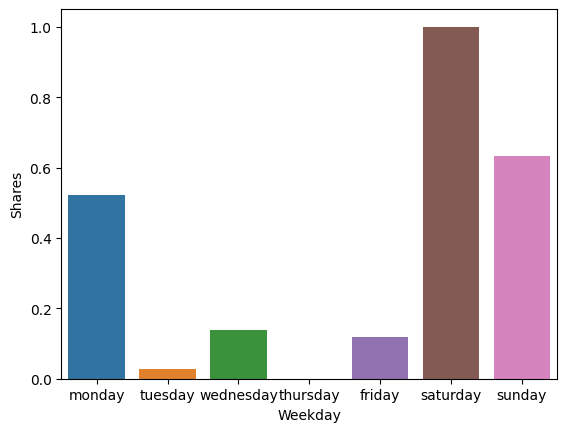

In [159]:
plot = sns.barplot(x=weekday_df.Weekday, y=weekday_df.Shares)
plot.set_xticklabels(x_ticks)

Now that we've scaled our data, we're able to view the relationship between the day of the week and the number of shares _much_ more clearly. There's a clear difference in shares, as the number of shares on a weekday such as Wednesday is only 20% the number of shares on a weekend such as Saturday.

Another thing we can explore in a similar fashion would be the effect of different topics on the average number of shares. Thankfully, we have features such as `data_channel_is_lifestyle` that can help us with that task. We can refer to the [description of the dataset](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity) on the website the dataset was published on to learn what columns there are, and what each one represents.

I'll be taking the columns that represent data channels and plotting them in a bar graph.

In [166]:
channel_columns = [' data_channel_is_lifestyle', ' data_channel_is_entertainment', 
                   ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', 
                  ' data_channel_is_world']
avg_shares = [0. for _ in channel_columns]

# Construct topic-to-shares DataFrame
channel_df = pd.DataFrame({"Channel": channel_columns, "Shares": avg_shares})

# Fill in value of average shares
for i, col in enumerate(channel_columns):
    channel_df.loc[i, "Shares"] = news_df[news_df[col] == 1.0][' shares'].mean()

# Scale values of Share column
scaler = MinMaxScaler()
channel_df.Shares = scaler.fit_transform(channel_df.Shares.to_numpy().reshape(-1, 1))    # Fit scaler to Shares column

channel_df

,Channel,Shares
0,data_channel_is_lifestyle,1.000000
1,data_channel_is_entertainment,0.489643
2,data_channel_is_bus,0.556003
3,data_channel_is_socmed,0.962177
4,data_channel_is_tech,0.562647
5,data_channel_is_world,0.000000


[Text(0, 0, 'lifestyle'),
 Text(1, 0, 'entertainment'),
 Text(2, 0, 'bus'),
 Text(3, 0, 'socmed'),
 Text(4, 0, 'tech'),
 Text(5, 0, 'world')]

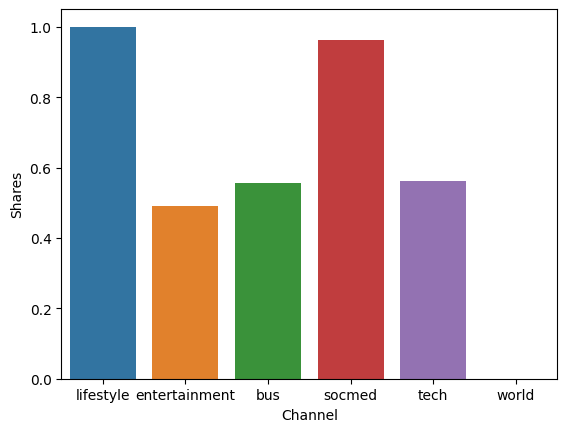

In [168]:
# Plot barplot
x_ticks = [x.split("_")[-1] for x in channel_columns]
plot = sns.barplot(x=channel_df.Channel, y=channel_df.Shares)
plot.set_xticklabels(x_ticks)

Judging by the barplot above, we can easily come to the conclusion that if a specific article's data channel is lifestyle or social media, it's more likely it'll get more shares.

Next, let's check the relationship between the number of article shares and how positive or negative the article was.

For this, we can check how positive/negative the article was in _general_ (both title and text taken into consideration) using the `global_sentiment_polarity` column

<Axes: xlabel=' global_sentiment_polarity', ylabel=' shares'>

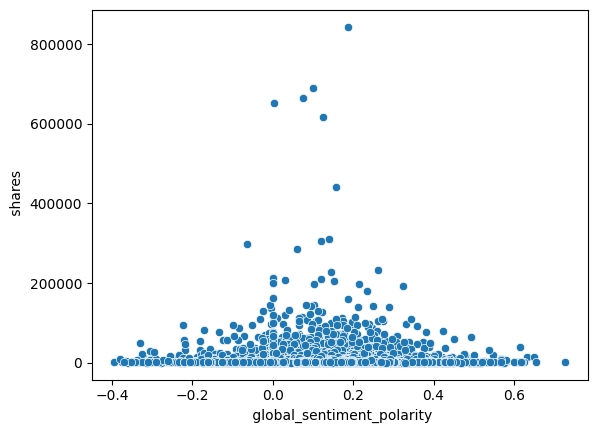

In [119]:
sns.scatterplot(y=news_df[' shares'], x=news_df[' global_sentiment_polarity'])

There's not _much_ we can glean, but there seems to be a clear trend where neutral articles are shared more.

We can also add an extra variable to the scatter plot above, `title_sentiment_polarity` which indicates the "mood" of the article title. This way, we might gain some valuable insights (for example, if the difference in the title mood vs. the overall article has any relation to the number of shares)

<Axes: xlabel=' global_sentiment_polarity', ylabel=' shares'>

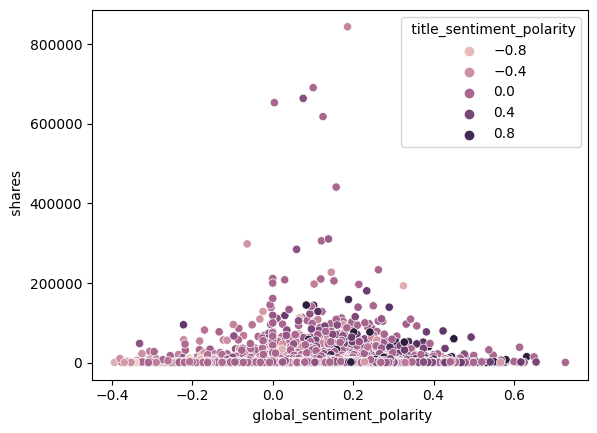

In [121]:
sns.scatterplot(y=news_df[' shares'], x=news_df[' global_sentiment_polarity'], hue=news_df[" title_sentiment_polarity"])

No clear relation here.

Something else that we _can_ do is bin the data of the global sentiment to two general categories: 'positive' and 'negative'. That way, we can separate the data more cleanly and look for any potential correlations in the data between sentiment and number of shares.

In [182]:
sentiment_df = news_df.loc[:, [' global_sentiment_polarity', ' shares']]    # Get relevant columns from the main dataframe
sentiment_df['is_positive'] = sentiment_df[' global_sentiment_polarity'] > 0
sentiment_df

,global_sentiment_polarity,shares,is_positive
0,0.092562,593,True
1,0.148948,711,True
2,0.323333,1500,True
3,0.100705,1200,True
4,0.281003,505,True
...,...,...,...
39639,0.141964,1800,True
39640,0.194249,1900,True
39641,0.024609,1900,True
39642,-0.008066,1100,False


c:\users\saqi\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 59.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='is_positive', ylabel=' shares'>

c:\users\saqi\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\saqi\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 70.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


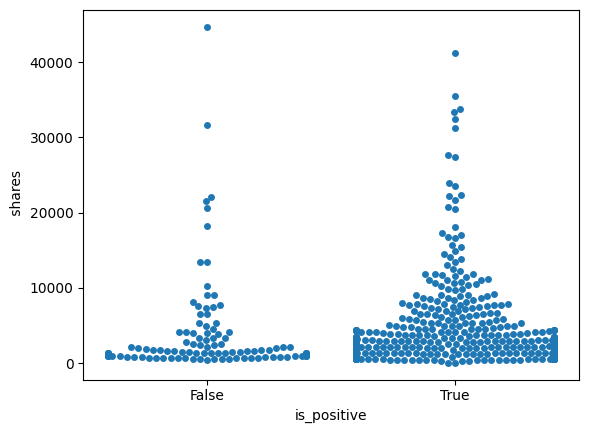

In [183]:
# Construct categorical scatter plot
# However, there are a lot of points and plotting might take a very long time if we're not careful, so we'll only plot ~1000 points
small_df = sentiment_df.iloc[::40]
sns.swarmplot(data=small_df, x='is_positive', y=' shares')

It appears that there's a slightly stronger relation between positive articles and number of shares, however, it might only *appear* this way (rather than actually being the truth) as there are a larger number of positive samples versus negative samples and the data may be skewed in `is_positive=True`'s favor.

Another thing we can check is the correlation between the number of shares of the worst and best keyword per article versus total number of shares. This will tell us how much of a role that a keyword might've played in the shareability of a specific article.

We can use a heatmap here to properly illustrate the correlations between each column.

In [188]:
keyword_columns = [' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', 
                   ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg']

keyword_df = news_df.loc[:, keyword_columns + [' shares']]

<Axes: >

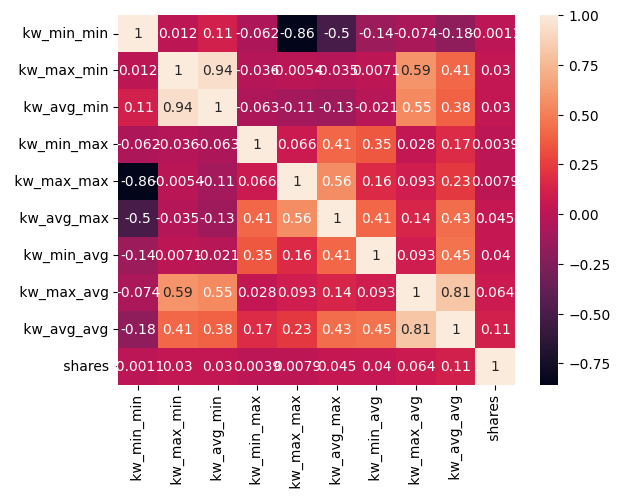

In [191]:
corr = keyword_df.corr()

sns.heatmap(corr, annot=True)

While there doesn't seem to be a clear correlation between the number of shares and how many times a specific keyword has been shared, there's a clear correlation between how many times different keywords have been shared in a specific article. 

For instance, there is a strong negative correlation between the max number of shares for the best keyword and the minimum number of shares for the worst keyword, but also a very strong positive correlation between the minimum number of shares for the average number of shares for the worst keyword and the maximum number of shares for the worst keyword. In other words, the higher the maximum, the higher the average. However, due to the nature of the feature, this was already obvious, and it doesn't tell us much.

Lastly, we can check and see if the number of images and videos in a specific article plays any role in the number of shares. We can check this with a correlation heatmap;

In [193]:
media_cols = [" num_imgs", ' num_videos']

media_df = news_df.loc[:, media_cols + [" shares"]]

media_df

,num_imgs,num_videos,shares
0,1.0,0.0,593
1,1.0,0.0,711
2,1.0,0.0,1500
3,1.0,0.0,1200
4,20.0,0.0,505
...,...,...,...
39639,1.0,1.0,1800
39640,3.0,48.0,1900
39641,12.0,1.0,1900
39642,1.0,0.0,1100


<Axes: >

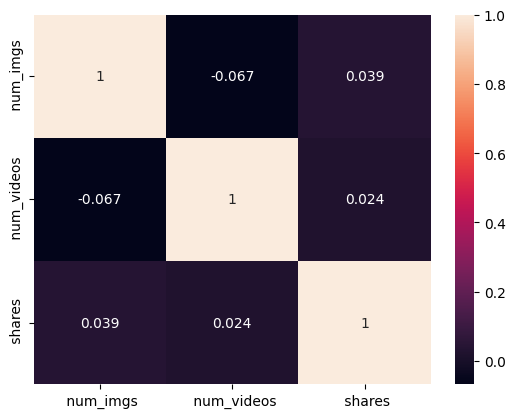

In [195]:
corr = media_df.corr()

sns.heatmap(corr, annot=True)

Again, there's no obvious relation (save for the fact that it's slightly less likely that we'll have a lot of images in an article with a high number of videos), but we can further illustrate any potential relationships;

Text(0.5, 0, '# of Media')

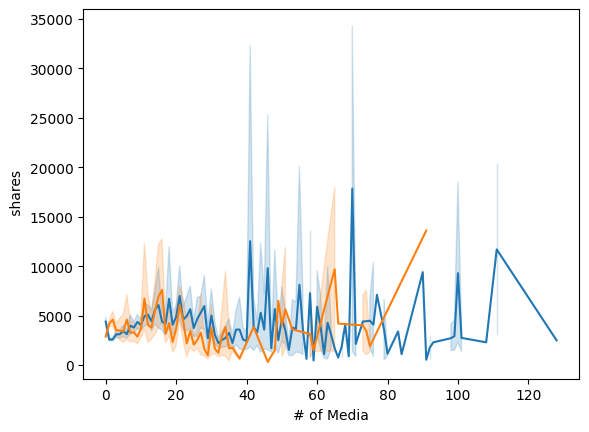

In [207]:
plt = sns.lineplot(x=media_df[" num_imgs"], y=media_df[" shares"])
sns.lineplot(x=media_df[" num_videos"], y=media_df[" shares"])

plt.set_xlabel("# of Media")

No clear relation here either. 


### - *Propose 5 different hypothesis tests related to the dataset. At least use 3 different tests.*

*Hypothesis testing* refers to the process of conducting analysis on a data sample to be able to make inferences about the overall data. Usually we're checking for one thing at a time and making inferences based on the values obtained from various statistical calculations. These inferences either validate assumptions we've made about our data or negate them.

Hypothesis testing is incredibly useful, because the insights it gives us can help us work with our data better; if statistical pre-processing is needed, if we should remove unnecessary features and etc.

The main steps for performing hypothesis tests are as such:

1. Formulate a hypothesis
2. Determine the significance level
3. Determine the type of test
4. Calculate the test statistic values and the p-values
5. Make a decision from the results of this test.

In hypothesis testing, there are two important parameters:
- *Null hypothesis* ($H_0$): The null hypothesis is a general statement that there is no relationship or association among groups. 
- *Alternative hypothesis* ($H_1$): The hypothesis contrary to the null hypothesis.

The aforementioned level of significance refers to the degree of significance that we reject or accept the null hypothesis. 
100% accuracy is not possible, therefore, our level of significance is usually around 5% — in other words, we're 95% confident in our new assumption.

> Another definition of note is the **p value**. This is the calculated probability that our null hypothesis $H_0$ is true. If our p-value is less than our level of significance we can reject our null hypothesis and assume our alternative hypothesis is true.

In [237]:
# The level of significance we'll be using for the remainder of this section of Exercise 12
level_of_significance = 0.05    # 5%

For these statistical tests, I'll be using the [Scipy](https://scipy.org/) python module, a well-known library for scientific and technical computing.


#### 1. Normal Distribution: Anderson-Darling Test

From Wikipedia, the [Anderson-Darling test](https://en.wikipedia.org/wiki/Anderson%E2%80%93Darling_test) is a test to see if a given sample of data is drawn from a given probability distribution, such as a Gausian distribution. 

The assumption for this test is that the observations in each sample are independent and identically distributed. Therefore, for our null and alternative test is as such:

- $H_0$: The sample has a Gaussian distribution
- $H_1$: The sample does not have a Gaussian distribution.

To calculate this, I'll be using Scipy's [`anderson`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html) method. This method takes two parameters:
- `x`: The array of sample data. In this example, we'll be passing in our data's `shares` column.
- `dist`: The type of distribution to test against. The default value is 'norm', as in a normal distribution, and is the distribution we are testing against.

I'll be testing this on every column in our dataframe to see which ones have a normal distribution.

In [229]:
from scipy.stats import anderson 

# Loop over every column
for col in news_df.columns:
    result = anderson(news_df[col])
     # The second index of the critical values corresponds to a level of significance of 5%, as per the documentation
    if result.statistic < result.critical_values[2]:   
        print(f"Column {col} probably has a normal distribution.")


#### 2. Correlation: Pearson's Correlation Coefficient

The [Pearson correlation coefficient (PCC)](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), also known as the bivariate correlation measures the linear correlation between two sets of data. The formula for calculation the correlation between two sets of data $X$ and $Y$ is as such:

$$
\rho_{X,Y} = \frac{cov(X, Y)}{\sigma_X \sigma_Y}
$$

Where $cov$ is the covariance, $\sigma_X$ and $\sigma_Y$ are the standard deviations of X and Y respectably. 

Pearson correlation has a number of assumptions;
- The observations in each sample are independent and identically distributed
- The observations in each sample are normally distributed
- The observations in each sample have the same variance.

So that our null and alternative hypothesis are as follows:

- $H_0$: The two samples are independent, normally distributed and have the same variance
- $H_1$: There is a dependency between the samples or another one of the assumptions above does not hold

I'll look to calculate the pearson correlation between different features and the `num_imgs` feature. In other words, does a specific column play a role in the number of images an article has?

To calculate this, I'll be using Scipy's [`pearsonr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) method. 

In [239]:
from scipy.stats import pearsonr

for col in news_df.columns:
    stat, p = pearsonr(news_df[col], news_df[' num_imgs'])
    if p > level_of_significance:
        print(f"Columns {col} and num_imgs are most likely independent")
    else:
        print(f"Columns {col} and num_imgs are most likely correlated")

Columns  n_tokens_title and num_imgs are most likely independent
Columns  n_tokens_content and num_imgs are most likely correlated
Columns  n_unique_tokens and num_imgs are most likely correlated
Columns  n_non_stop_words and num_imgs are most likely correlated
Columns  n_non_stop_unique_tokens and num_imgs are most likely correlated
Columns  num_hrefs and num_imgs are most likely correlated
Columns  num_self_hrefs and num_imgs are most likely correlated
Columns  num_imgs and num_imgs are most likely correlated
Columns  num_videos and num_imgs are most likely correlated
Columns  average_token_length and num_imgs are most likely correlated
Columns  num_keywords and num_imgs are most likely correlated
Columns  data_channel_is_lifestyle and num_imgs are most likely correlated
Columns  data_channel_is_entertainment and num_imgs are most likely correlated
Columns  data_channel_is_bus and num_imgs are most likely correlated
Columns  data_channel_is_socmed and num_imgs are most likely indepen

#### 3. Correlation: Kendall's Rank Correlation

Similarly, we can use [Kendall's Rank Correlation](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient) to check and see if two samples have a monotonic relationship or not. This test is considered to be [`nonparametric`](https://en.wikipedia.org/wiki/Nonparametric_statistics), meaning that it does not need the distribution to meet an assumption to be properly analyzed.
> Nonparametric tests are also sometimes called distribution-free tests for this very same reason.

Our assumptions are as follows:
- $H_0$: The two features are independent
- $H_1$: The two features are dependent on one another

We can use Scipy's [`kendalltau`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html) to calculate if `title_subjectivity` and other columns are related or not.


In [240]:
from scipy.stats import kendalltau

for col in news_df.columns:
    stat, p = pearsonr(news_df[col], news_df[' title_subjectivity'])
    if p > level_of_significance:
        print(f"Columns {col} and title_subjectivity are most likely independent")
    else:
        print(f"Columns {col} and title_subjectivity are most likely correlated")

Columns  n_tokens_title and title_subjectivity are most likely correlated
Columns  n_tokens_content and title_subjectivity are most likely independent
Columns  n_unique_tokens and title_subjectivity are most likely independent
Columns  n_non_stop_words and title_subjectivity are most likely independent
Columns  n_non_stop_unique_tokens and title_subjectivity are most likely independent
Columns  num_hrefs and title_subjectivity are most likely correlated
Columns  num_self_hrefs and title_subjectivity are most likely correlated
Columns  num_imgs and title_subjectivity are most likely correlated
Columns  num_videos and title_subjectivity are most likely correlated
Columns  average_token_length and title_subjectivity are most likely correlated
Columns  num_keywords and title_subjectivity are most likely correlated
Columns  data_channel_is_lifestyle and title_subjectivity are most likely independent
Columns  data_channel_is_entertainment and title_subjectivity are most likely correlated
Col

#### 4. Mann-Whitney U Test

The [Mann-Whitney U test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test) test checks to see if the distributions of two independent samples are equal or not. Usually, this test is used to test the difference in location between distributions.

This test operates under two assumptions:
- The observations in each sample are independent and identically distributed
- The observations in each sample can be ranked.

The null and alternate hypothesis are as follows:
- $H_0$: The distributions of both samples is the same
- $H_1$: the distributions of both samples are not equal

For this, we will refer back to the previous correlation tests, namely Kendall's Rank Coefficient (as it was also nonparametric and did not take distribution into consideration) and chose two columns that were independent of one another so that this test's assumptions hold true.
- The two columns I'll be using are `kw_max_max` and `title_subjectivity`.

Additionally, we'll be using Scipy's [`mannwhitneyu`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html) function to conduct this test.

In [244]:
from scipy.stats import mannwhitneyu

col_1 = ' kw_max_max'
col_2 = ' title_subjectivity'

stat, p = mannwhitneyu(news_df[col_1], news_df[col_2])

if p > level_of_significance:
    print(f"Columns{col_1} and{col_2} most likely belong to the same distribution.")
else:
    print(f"Columns{col_1} and{col_2} most likely do not belong to the same distribution.")

Columns kw_max_max and title_subjectivity most likely do not belong to the same distribution.


#### 5. Kruskal-Wallis H Test

The [Kruskal-Wallis H test](https://en.wikipedia.org/wiki/Kruskal%E2%80%93Wallis_one-way_analysis_of_variance) is very similar to the Mann-Whitney U test in the sense that we are checking to see whether the distributions for two features are equal or not. 

This test operates under two assumptions:
- The observations in each sample are independent and identically distributed
- The observations in each sample can be ranked.

The null and alternate hypothesis are as follows:
- $H_0$: The distributions of both samples is the same
- $H_1$: the distributions of both samples are not equal

I'll be using the same two columns as the previous test, namely `kw_max_max` and `title_subjectivity`. For conducting the actual test, I'll be using Scipy's [`kruskal`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html) method.

In [246]:
from scipy.stats import kruskal

stat, p = kruskal(news_df[col_1], news_df[col_2])

if p > level_of_significance:
    print(f"Columns{col_1} and{col_2} most likely belong to the same distribution.")
else:
    print(f"Columns{col_1} and{col_2} most likely do not belong to the same distribution.")

Columns kw_max_max and title_subjectivity most likely do not belong to the same distribution.


*Sources:*
- [DataCamp: Hypothesis Testing in Machine Learning](https://www.datacamp.com/tutorial/hypothesis-testing-machine-learning#:~:text=The%20process%20of%20hypothesis%20testing,will%20discuss%20in%20this%20tutorial.)
- [Analytics Vidhya: Everything you need to know about Hypothesis Testing in Machine Learning](https://www.analyticsvidhya.com/blog/2021/09/hypothesis-testing-in-machine-learning-everything-you-need-to-know/)
- [Machine Learning Mastery: 17 Statistical Hypothesis Tests in Python (Cheat Sheet)](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/)
- [Towards Data Science: Hypothesis testing in Machine learning using Python](https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce)
- [Corpporate Finance Institue: Nonaparametric Tests - Overview, Reasons to Use, Types](https://corporatefinanceinstitute.com/resources/data-science/nonparametric-tests/#:~:text=What%20are%20Nonparametric%20Tests%3F,to%20as%20distribution%2Dfree%20tests.)

### - *Try Ridge and Lasso regression.*

For this, I'll be using Scikit Learn's built-in models and methods:
- [Ridge model documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
- [Lasso model documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

For evaluation, I'll also be using Scikit Learn's [mean squared error (MSE)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) function to calculate cost.

In [253]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Split data into train/validation splits
x_train, x_val, y_train, y_val = train_test_split(news_df.drop(columns=' shares'), news_df[' shares'], 
                                                  test_size=0.2, random_state=rand_seed)

# Train and eval ridge regression model
ridge_reg = Ridge().fit(x_train, y_train)
ridge_val_pred = ridge_reg.predict(x_val)
ridge_cost = mean_squared_error(y_val, ridge_val_pred)
print(f"Cost for ridge regression model: {ridge_cost}")

# Train and eval lasso regression model
lasso_reg = Lasso().fit(x_train, y_train)
lasso_val_pred = lasso_reg.predict(x_val)
lasso_cost = mean_squared_error(y_val, lasso_val_pred)
print(f"Cost for lasso regression model: {lasso_cost}")

Cost for ridge regression model: 269404777.80223584
Cost for lasso regression model: 267829872.91184846


For future sections of this question, I'll wrap the lines above into a function so it's easy to gauge model performance. This function will only take a dataframe as a parameter, so we can test how well our feature engineering works on the model performance.

In [293]:
def train_lasso_ridge(df):
    # Split data into train/validation splits
    x_train, x_val, y_train, y_val = train_test_split(df.drop(columns=' shares'), df[' shares'], 
                                                      test_size=0.2, random_state=rand_seed)

    # Train and eval ridge regression model
    ridge_reg = Ridge().fit(x_train, y_train)
    ridge_val_pred = ridge_reg.predict(x_val)
    ridge_cost = mean_squared_error(y_val, ridge_val_pred)
    print(f"Cost for ridge regression model: {ridge_cost}")
    print(f"Average cost for ridge regression model: {ridge_cost/ridge_val_pred.shape[0]}")

    # Train and eval lasso regression model
    lasso_reg = Lasso().fit(x_train, y_train)
    lasso_val_pred = lasso_reg.predict(x_val)
    lasso_cost = mean_squared_error(y_val, lasso_val_pred)
    print(f"Cost for lasso regression model: {lasso_cost}")
    print(f"Average cost for lasso regression model: {lasso_cost/ridge_val_pred.shape[0]}")
    
    return ridge_cost, lasso_cost

train_lasso_ridge(news_df)

Cost for ridge regression model: 269404777.80223584
Average cost for ridge regression model: 33977.144381666774
Cost for lasso regression model: 267829872.91184846
Average cost for lasso regression model: 33778.518465361136


(269404777.80223584, 267829872.91184846)

### - *Use various scaling methods and report their effects.*

From the rudimentary EDA and hypothesis tests performed earlier on in this exercise, we already know different features have different variances. Similarly, some of the features are on different scales than others, and that can cause issues. We can further glimpse into the severity of this problem by calling the `describe()` function on our main dataframe.

In [258]:
news_df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


We can scale the columns using Scikit Learn's [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to both push the columns between a [-1, 1] range by removing the mean and scaling to unit variance. 

First, we'll create a copy of our previous dataframe, and then scale columns one by one, save for the `shares` column. Then, we'll pass the new dataframe onto the `train_lasso_ridge` function defined previously and gauge model performance.

In [294]:
from sklearn.preprocessing import StandardScaler

news_df_std = news_df.copy()
news_df_std.drop(columns=[' shares'], inplace=True)    # Temporarily remove shares column as we're not looking to scale that specific column

for col in news_df_std.columns:
    scaler = StandardScaler()
    news_df_std[col] = scaler.fit_transform(news_df_std[col].to_numpy().reshape(-1, 1))

news_df_std

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0.757447,-0.695210,0.032772,0.000675,0.038658,-0.607463,-0.335566,-0.426526,-0.304268,0.156474,...,0.237337,0.063865,-0.228941,-0.708369,-0.268895,-0.969886,0.671245,-0.975432,-1.810719,0.138920
1,-0.661657,-0.618794,0.016056,0.000675,0.031479,-0.695709,-0.594963,-0.426526,-0.304268,0.432838,...,-0.640040,-0.870968,-0.228941,1.102174,1.367424,0.078642,-0.870807,-0.269076,0.837749,-0.689658
2,-0.661657,-0.712192,0.007645,0.000675,-0.007752,-0.695709,-0.594963,-0.426526,-0.304268,-0.183415,...,1.358401,0.063865,0.981798,-1.621797,-0.957871,-0.270867,-0.870807,-0.269076,0.837749,-0.689658
3,-0.661657,-0.032933,-0.012619,0.000675,-0.007211,-0.166229,-0.854360,-0.426526,-0.304268,-0.169758,...,0.307442,0.573773,0.174639,-0.862584,-0.268895,-0.620377,-0.870807,-0.269076,0.837749,-0.689658
4,1.230482,1.115439,-0.037655,0.000675,-0.045420,0.716237,4.074185,1.860061,-0.304268,0.159400,...,0.548135,-0.870968,0.981798,0.307944,0.075594,0.602906,0.531059,0.244637,-1.569949,-0.087056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.284413,-0.425630,-0.005443,0.000675,-0.001346,-0.166229,0.961420,-0.426526,-0.060829,-0.029747,...,-0.191635,0.063865,-0.027151,-0.003726,0.075594,-0.183490,-0.562396,-0.269076,0.308055,-0.689658
39640,0.757447,-0.463838,0.042060,0.000675,0.059999,-0.166229,0.961420,-0.185832,11.380809,-0.169058,...,0.200881,0.573773,-0.228941,0.379044,0.420082,0.078642,0.054425,3.498156,-0.751332,3.729424
39641,-0.188622,-0.221852,-0.009050,0.000675,-0.013798,1.157470,-0.594963,0.897288,-0.060829,0.626110,...,-0.445302,0.573773,-1.036100,-0.758786,-0.957871,-0.620377,0.531059,0.244637,-1.569949,-0.087056
39642,-2.080761,0.287592,-0.002477,0.000675,0.001068,-0.077983,-0.594963,-0.426526,-0.304268,0.505491,...,-1.118934,-0.461978,-1.036100,0.424968,0.075594,0.996104,-0.870807,-0.269076,0.837749,-0.689658


Now that we've scaled our data, we can check its effect on model performance:

In [295]:
# Bring shares column back before fitting model on new data
news_df_std[' shares'] = news_df[' shares']

train_lasso_ridge(news_df_std)

Cost for ridge regression model: 232968482.1062608
Average cost for ridge regression model: 29381.823950846363
Cost for lasso regression model: 135172031.8720749
Average cost for lasso regression model: 17047.803237744345


c:\users\saqi\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.178e+09, tolerance: 4.664e+08
  model = cd_fast.enet_coordinate_descent(


(232968482.1062608, 135172031.8720749)

And we can already tell that normalizing our data is greatly decreased model cost.

Another scaler we can use is [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). We can test its effects similar to how we had tested StandardScaler.

In [296]:
from sklearn.preprocessing import MinMaxScaler

news_df_mm = news_df.copy()
news_df_mm.drop(columns=[' shares'], inplace=True)    # Temporarily remove shares column as we're not looking to scale that specific column

for col in news_df_mm.columns:
    scaler = MinMaxScaler()
    news_df_mm[col] = scaler.fit_transform(news_df_mm[col].to_numpy().reshape(-1, 1))

news_df_mm[' shares'] = news_df[' shares']
train_lasso_ridge(news_df_mm)

Cost for ridge regression model: 85971465.52473389
Average cost for ridge regression model: 10842.661814192696
Cost for lasso regression model: 85923504.00293887
Average cost for lasso regression model: 10836.612940211737


(85971465.52473389, 85923504.00293887)

Interestingly, the MinMax Scaler improves the two models performance to a greater degree than the previous scaler.

Another scaler we can test is the [`PowerTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html), which paplies a power transform featurewise to make data more Gaussian-like. According to the scikit-learn documentation:

> Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

In [278]:
from sklearn.preprocessing import PowerTransformer

news_df_pow = news_df.copy()
news_df_pow.drop(columns=[' shares'], inplace=True)    # Temporarily remove shares column as we're not looking to scale that specific column

for col in news_df_pow.columns:
    scaler = PowerTransformer()
    news_df_pow[col] = scaler.fit_transform(news_df_pow[col].to_numpy().reshape(-1, 1))

news_df_pow[' shares'] = news_df[' shares']
train_lasso_ridge(news_df_pow)

Cost for ridge regression model: 85677184.68353161
Average cost for ridge regression model: 10805.547317887706
Cost for lasso regression model: 85699729.41939563
Average cost for lasso regression model: 10808.390644393445


c:\users\saqi\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.174e+09, tolerance: 4.664e+08
  model = cd_fast.enet_coordinate_descent(


### - *Add polynomial features and report their effect.*

In [286]:
from sklearn.preprocessing import PolynomialFeatures

news_poly = news_df.copy()
news_poly.drop(columns=' shares', inplace=True)

transformer = PolynomialFeatures(degree=2)
news_poly = transformer.fit_transform(news_poly)

news_poly.shape

(39644, 1770)

In [ ]:
news_poly = pd.DataFrame(news_poly)

news_poly[' shares'] = news_df[' shares']

train_lasso_ridge(news_poly)

This did not work as our cost was greatly increased. However, we can try this again with scaled features from the previous section of this exercise;

In [292]:
news_df_poly2 = news_df_pow.copy()
news_df_poly2.drop(columns=' shares', inplace=True)

transformer = PolynomialFeatures(degree=2)
news_df_poly2 = transformer.fit_transform(news_df_poly2)

news_df_poly2 = pd.DataFrame(news_df_poly2)
news_df_poly2[' shares'] = news_df[' shares']

train_lasso_ridge(news_poly)

c:\users\saqi\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.7842e-29): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Cost for ridge regression model: 905837369028409.6
Average cost for ridge regression model: 114243582927.02858
Cost for lasso regression model: 11054195312.393135
Average cost for lasso regression model: 1394147.472870871


c:\users\saqi\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.072e+12, tolerance: 4.664e+08
  model = cd_fast.enet_coordinate_descent(


Our results are still not very good. This may be due to the fact that there are many columns in previous sections that are "useless"; they have little to no effect on model performance. We know this based on the hypothesis tests conducted in the previous sections of this exercise.

*Sources:*
- [Machine Learning Mastery: How to Use Polynomial Feature Transforms for Machine Learning](https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/)

### - *Apply the feature selection methods that you have implemented in the above sections.*

For this section of this exercise, I'll be simply reusing the code from **Exercise 10** with little to no explanation, as I've already explained the code at length. 

I'll be using the lasso model here, as it has performed consistently better than ridge regression during this exercise. I'll also be using the dataframe scaled via the power scaler (`news_df_pow`), as that has shown to have the greatest improvement.

#### Forward Selection

In [313]:
import numpy as np

candidate_features = list(news_df.columns.values)   # List all potential features
candidate_features.remove(' shares')
best_candidate = None
best_candidate_performance = np.inf

# For logging best performing model so far
best_performance = np.inf     # The less our model's 
best_performing_features = []

# Splitting data into train/validation sets for (somewhat) accurate assessment  
x_train, x_val, y_train, y_val = train_test_split(news_df_pow.drop(columns=' shares'), news_df_pow[' shares'], 
                                                      test_size=0.2, random_state=rand_seed)

In [317]:
while len(candidate_features) > 0:
    for candidate in candidate_features:
        # Create subset of training dataset with selected features
        current_features = best_performing_features + [candidate]
        train_subset = x_train[current_features]
        
        # Train linear regression model
        reg = Lasso().fit(train_subset, y_train)
        
        # Get prediction on validation set
        val_subset = x_val[current_features]
        pred = reg.predict(val_subset)
        
        # Get model performance using mse() defined above
        cost = mse(pred, y_val)
        if cost < best_candidate_performance:
            best_candidate_performance = cost
            best_candidate = candidate
        
    # Check if model has improved
    if best_candidate is not None:
        best_performing_features.append(best_candidate)
        print(f"Adding feature: {best_candidate}")
        candidate_features.remove(best_candidate)
        best_performance = best_candidate_performance
    
    else:
        print("No improvement! Stopping...")
        break
        
    # Reset loop
    best_candidate = None
    best_candidate_performance = best_performance

    
print("Selected features: ")
print(best_performing_features)
print(f"Best model cost: {best_performance}")

Adding feature:  LDA_03
Adding feature:  kw_min_max
Adding feature:  num_videos
Adding feature:  data_channel_is_entertainment
Adding feature:  weekday_is_monday
Adding feature:  avg_negative_polarity
Adding feature:  n_non_stop_unique_tokens
Adding feature:  self_reference_avg_sharess
Adding feature:  num_self_hrefs
Adding feature:  global_subjectivity
Adding feature:  min_positive_polarity
Adding feature:  weekday_is_saturday
Adding feature:  n_tokens_title
Adding feature:  kw_min_avg
Adding feature:  LDA_00
Adding feature:  LDA_04
Adding feature:  LDA_01
Adding feature:  n_unique_tokens
Adding feature:  self_reference_min_shares
Adding feature:  self_reference_max_shares
Adding feature:  abs_title_subjectivity
Adding feature:  title_sentiment_polarity
Adding feature:  global_rate_positive_words
Adding feature:  rate_negative_words
Adding feature:  num_keywords
Adding feature:  weekday_is_sunday


KeyboardInterrupt: 

#### Backward Selection

In [ ]:
remaining_features = list(x_train.columns.values)
removed_features = []

candidate_feature = None
best_candidate_cost = np.inf

prev_cost = np.inf

while len(remaining_features) > 0:
    for feat in remaining_features:
        # Create subset of training dataset with selected features
        features_to_drop = removed_features + [feat]
        train_subset = x_train.drop(columns=features_to_drop, axis=1)
        
        # Train linear regression model
        reg = Lasso().fit(train_subset, y_train)
        
        # Get predictions on validation set
        val_subset = x_val.drop(columns=features_to_drop, axis=1)
        pred = reg.predict(val_subset)
        
        # Get model performance using mse() defined above
        cost = mse(pred, y_val)
        if cost < best_candidate_cost:
            best_candidate_cost = cost
            candidate_feature = feat
        
    # Check if removing best feature is "worth it", e.g. 1% decrease
    if best_candidate_cost - prev_cost < prev_cost * 0.05:
        removed_features.append(candidate_feature)
        remaining_features.remove(candidate_feature)
        prev_cost = best_candidate_cost
        print(f"Removing feature: {candidate_feature}")
    else:
        print("No improvement! Stopping...")
        break
    
    # Reset loop
    candidate_feature = None
    best_candidate_cost = np.inf

print("Remaining features: ")
print(remaining_features)
print(f"Best model cost: {prev_cost}")

# **Exercise 13:**

## *Implement batch gradient descent with early stopping for softmax regression from scratch. Use it on a classification task on the Penguins dataset.*

### A. Data Preprocessing and (Some) EDA

For sourcing the data, I'll be using the [`palmerpenguins`](https://github.com/mcnakhaee/palmerpenguins) python module. The original dataset published by Allison Horst exists [here](https://allisonhorst.github.io/palmerpenguins/) as an R package, and this module is a python port.

In [ ]:
!pip install palmerpenguins

from palmerpenguins import load_penguins
penguins = load_penguins()
penguins.head()

Judging by the sample above, there's some feature engineering we need to do before continuing:
1. There are `NaN` values. We can further verify this by counting the number of `NaN` values. 

> It should be noted that we should check for `NaN` values regardless of if we spot any using `head()` or `tail()` or any similar functions.

In [ ]:
penguins.isna().sum()

We can then fill these values according to their species, so that we don't add to the noise in our data by filling in values for entries using data from other classes;

In [ ]:
# List columns with NaN values
na_columns = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g", "sex"]

# Fill in empty values per column
for column in na_columns:
  penguins[column] = (penguins.groupby("species", group_keys=False)[column].apply(lambda s: s.bfill().ffill()))

# Count number of NaN values per column
penguins.isna().sum()

2. There are a number of categorical features that should be converted to corresponding numerical values, so we can use them in our machine learning model. For instance, for the `species` column:

In [ ]:
penguins.species.value_counts()

We can see here that there are a limited number of classes in the `species` column, but these classes are strings, and we won't be able to use them directly in a model. Therefore, we can convert each class to a code for all columns that have categorical values;

In [ ]:
cat_columns = ["species", "island", "sex"]

for col_name in cat_columns:
    penguins[col_name]= penguins[col_name].astype('category')
    penguins[col_name] = penguins[col_name].cat.codes


penguins.head()

3. We can also gauge the importance of features like `island` and `year` using a heatmap, and then judging if these features should be dropped or not. We can do this by calculating the correlation between different columns using Pandas's built in [`corr`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) function and then plotting the correlations in a [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

In [ ]:
corr = penguins.corr()    # Calculate column-wise correlations

# Plot relevant heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

Judging by the heatmap above, we were able to learn that `sex` and `year` have very little correlation with `species` (which so happens to be the column we're aiming to predict), so we can safely remove these two columns from our dataframe;

In [ ]:
penguins.drop(["sex", "year"], inplace=True, axis=1)

# Preview how the final dataframe looks like:
penguins.head()

4. Finally, we'll scale our data so that:
- All features have the same scale
- We won't run into issues when calculating exponents later on

For this, we'll be using Scikit-Learn's [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) which standardizes features by removing the mean and scaling to a unit variance. In other words, it scales each column to [0, 1], centers it to a mean of 0 and a deviation of 1.

This is done by calculating the standard score of a sample $x$:

$$
z = \frac{x - 𝜇}{s}
$$

Where $𝜇$ is the mean of the samples (or zero if the `with_mean` parameter is set to `False`) and `s` is the standard deviation of the training samples (or one if the `with_std` parameter is set to `False`)

`StandardScaler` makes it so that the feature columns take on a normal distribution, making it easier to learn the parameters, especially for models like logistic regression and SVM. This is done in a way that useful information is still maintained, especially regarding outliers while also making the algorithm less sensitive to them. This is in contrast to min-max scaling where the data is scaled to a limited range of values.

We'll do this for columns with continuous values, e.g. `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm` and `body_mass_g`.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

columns_to_scale = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]

for column in columns_to_scale:
  col_data = penguins[column].to_numpy().reshape(-1, 1)
  penguins[column] = scaler.fit_transform(col_data)

penguins.head()

Now that we're done preprocessing our data, we can finally split our data into train/test datasets and move onto the actual model.

In [ ]:
# Split the data into train/test pairs
from sklearn.model_selection import train_test_split

pen_train, pen_val = train_test_split(penguins, test_size=0.2, random_state=rand_seed)

x_train, y_train = pen_train.drop('species', axis=1), pen_train.species
x_val, y_val = pen_val.drop('species', axis=1), pen_val.species

### B. Creating the Model

As per the problem specification, the model we'll be using in this problem is a model based on *softmax regression*.

Softmax regression is a form of logistic regression — e.g. the task at hand is a classification one where we're attempting to predict if a specific input vector belongs to a certain class. This method normalizes an input to a vector of probability distributions that sums up to 1.

The output of this method is a vector of values between 0 and 1, each corresponding to the probability that our input belongs to a certain class.

- Softmax regression is sometimes called multinomial logistic regression, because we're able to accommodate as many classes as we need for our specific task.

In softmax regression, we have the softmax *function* which is defined as below:

$$
P(y=j | z^{(i)}) = \frac{e^{z(t)}}{Σ^{k}_{j=0}e^{z(t)}_k}
$$

Where we have $k$ number of classes. And $z$ is defined as below:

$$
z = \theta^Tx + b = \theta_1x_1 + \theta_2x_2 + ... + \theta_mx_m + b
$$

Where we have $m$ features and $\theta$ denotes the coefficients we're aiming to learn, with $b$ being our intercept or bias.

> The term $\frac{1}{\sum^K_{j=1}exp(\theta^{(j)T})}$ normalizes the distribution so it sums to 1.

Similar to Exercise 6, we'll initialize our parameters using Numpy's `np.random.rand`. The number of coefficients will be one more than the number of columns in `x_train`, with the last coefficient being the bias.

In [ ]:
np.random.seed(rand_seed)    # Just in case we haven't already set our random seed for reproducability

n_classes = penguins.species.unique().shape[0]
n_features = x_train.shape[1]

parameters = np.random.rand(n_classes, n_features + 1)    # n_classes number of coefficients for each feature (including intercept)
parameters

We can then write a function for getting our model's prediction for a single input;

In [ ]:
def get_pred_softmax(input):
  class_probs = []
  
  row = input.to_numpy()   # Convers Pandas Series row to Numpy Array
  row = np.append(row, 1)    # Add bias

  for i in range(n_classes):
    prob = np.dot(row, parameters[i])
    class_probs.append(np.exp(prob))

  classwise_prob = class_probs/sum(class_probs)    # Class-wise probabilities that sum up to 1

  # The class with the highest probability is considered to be model selection
  return classwise_prob

pred = get_pred_softmax(x_train.iloc[0])
print(f"Model prediction: {np.argmax(pred)}\nClass-wise predictions: {pred}")


Our goal is to set $\theta$ such that we minimize the cost function below; 

$$
J(\theta;b) = \frac{1}{n}\sum^n_{i=1}H(y_i, pred_i) 
$$

Where $H_i$ is the cross-entropy function defined by:

$$
H(y_i, pred_i) = - \sum_my_i.log(pred_i)
$$

If we take the derivative, the gradient $∇\theta_jJ(\theta_i;b)$ is:

$$
∇\theta_jJ(\theta_i;b)=\frac{1}{n}\sum^n_{i=0}[x^{(i)}(pred_i - y_i)]
$$

*(proof omitted for brevity)*

So we can update the parameters using this function:

$$
\theta_j = \theta_j - \alpha∇\theta_jJ(\theta_i;b)
$$

For every class $j=1,...,k$. Where $\alpha$ is our learning rate that'll dictate how big each step will be and $m$ is the number of samples in our batch.


In [ ]:
learning_rate = 1.0

# Convert y label to one-hot vector of probabilities
def one_hot_label(label):
  probs = [0.0 for i in range(n_classes)]
  probs[label] = 1.0
  return np.array(probs)

# Cost function derivative for single input
def calc_gradient(pred, label, input):
  delta = pred - label
  input = np.atleast_2d(np.append(input, 1)).repeat(n_classes, axis=0)
  grad = input.T.dot(delta)
  return grad


# Update parameters for a specific batch
def update_params(inputs, labels, lr=learning_rate):
  global parameters

  # Convert to numpy
  labels = labels.to_numpy()

  # Loop over batch, get gradient for each single observation
  gradients = []
  for i in range(inputs.shape[0]):
    row = inputs.iloc[i]
    label = labels[i]
    o_h_label = one_hot_label(label)
    pred = get_pred_softmax(row)

    grad = calc_gradient(pred, o_h_label, row.to_numpy())
    gradients.append(grad)

  gradients = np.array(gradients).sum(axis=0)
  gradients /= inputs.shape[0]
  gradients *= lr


  parameters[label] -= gradients
    


print("Parameters before update: ")
print(parameters)

# Update coefficients with a batch size of 10
update_params(x_train.iloc[0:10], y_train.iloc[0:10])

print("\n***\n")
print("Parameters after update:")
print(parameters)

Now that we've got the core training function in place, we can now create our main training loop. We'll write a simple function that count the number of correct predictions against incorrect ones.

As per the problem specification, we'll be using batch gradient descent and early stopping as well.
- With batch gradient descent, we won't be using one sample at a time for training our model, but instead dividing the dataset up into "batches" (the size of which defined by the parameter `batch_size`) which we will feed to our model and use the averaged error over that batch to tune our coefficients. The function `update_params` above already supports this.
- With early stopping, I'll be constantly monitoring model performance on the validation set during training. Of course, I'll have a predefined number of epochs, but should our model begin to overfit (e.g. begins to perform worse over a set number of epochs (defined by the parameter `patience`)), we'll assume we're done training our model and stop the training process earlier.

**Side note**: We'll also add a small function that gives us the final model prediction. In other words, out of the list of class probabilities, which class had the highest probability.

In [ ]:
def calc_acc(y1_list, y2_list):
  count = 0
  for y1, y2 in zip(y1_list, y2_list):
    if y1 == y2:
      count += 1
  return count/len(y1_list)

def final_prediction(pred):
  return np.argmax(pred)

batch_size = 1
n_epochs = 100
patience = 30   # Wait for this many rounds before stopping
best_score = -1
n_count = 0


n_batches = int(x_train.shape[0] / batch_size)



for epoch in range(n_epochs):
  
  # Train over batches
  for i in range(n_batches):
    start_idx, end_idx = i * batch_size, (i+1) * batch_size
    update_params(x_train.iloc[start_idx:end_idx], y_train.iloc[start_idx:end_idx])
  
  # Get predictions on validation set
  val_pred = []
  for i in range(x_val.shape[0]):
    val_pred.append(final_prediction(get_pred_softmax(x_val.iloc[i])))
  
  train_pred = []
  for i in range(x_train.shape[0]):
    train_pred.append(final_prediction(get_pred_softmax(x_train.iloc[i])))


  score = calc_acc(y_val, val_pred)
  train_score = calc_acc(y_train, train_pred)

  if epoch%1 == 0:
    print(f"Epoch: {epoch}/{n_epochs-1}")
    print(f"Training Score: {train_score}")
    print(f"Validation Score: {score}")
    print(parameters)


  # Early stopping
  if score > best_score:
    best_score = score
    n_count = 0
  else:
    n_count += 1
    print(f"Try {n_count}/{patience}")
    if n_count >= patience:
      print(f"No model improvement over the last {n_count} rounds! Stopping...")
      break

print(f"Best score: {best_score}")


*Sources:*
- [Towards Data Science: The Softmax Function, Simplified](https://towardsdatascience.com/softmax-function-simplified-714068bf8156)
- [Stanford: Softmax Regression](http://deeplearning.stanford.edu/tutorial/supervised/SoftmaxRegression/#:~:text=Properties%20of%20softmax%20regression%20parameterization&text=label%20probabilities%20as-,P(y(i)%3Dk%7Cx(i,%E2%8A%A4x(i)).)
- [Data Science StackExchange: When should I use StandardScaler and when MinMaxScaler?](https://datascience.stackexchange.com/questions/43972/when-should-i-use-standardscaler-and-when-minmaxscaler)
- [Python Machine Learning Book code: Softmax Regression](https://github.com/rasbt/python-machine-learning-book/blob/master/code/bonus/softmax-regression.ipynb)